# import pandas

In [1]:
import pandas as pd
from tresboncoin.fuzzy_match import fuzzy_match_one
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

# Fuzzy match

In [2]:
X_input = pd.DataFrame({'uniq_id': ["id"],
                        'brand': [None],
                        'model': [None],
                        'title': ["yamaha"],
                        'price': [4500],
                        'mileage': [5002],
                        'bike_year': [2010],
                        'engine_size': [250]})
X_pred = pd.DataFrame(
    {'uniq_id': ['ERT34983'],
     'brand': [None],
     'model': [None],
     'title': ['Doucati Monster'],
     'price': [4500],
     'mileage': [5002],
     'bike_year': [2010],
     'engine_size': [None]})

In [3]:
fuzzy_match_one(X_pred)

,uniq_id,price,mileage,bike_year,engine_size,brand,model,brand_db,model_db,category_db,engine_size_db,power_db
0,ERT34983,4500,5002,2010,None,ducati,monster696,ducati,monster696,naked bike,696.0,78.9


# Bikez

In [4]:
bikez = pd.read_csv("../../tresboncoin/data/master_vehicule_list/bikez.csv")

In [5]:
bikez.head(1)

,brand_db,model_db,model_inv_db,model_submodel_db,model_submodel_inv_db,year_db,category_db,engine_type_db,engine_size_db,power_db,torque_db,compression_db,cooling_system_db,dry_weight_db,power/weight_ratio_db,model_size_db,model_size_inv_db
0,ajs,model8,model8,model8350,3508model,1962,sport,single cylinder,348.0,21.0,NaN,7.5:1,Air,153.0,0.1373,model8348,model8348


# brands dataset

In [6]:
ebay_db = pd.read_csv("../../tresboncoin/data/March_2021_MPSOV.csv")

In [7]:
brands_full = ebay_db["Make"].apply(lambda x: x.lower())
brands_full = pd.DataFrame(brands_full).drop_duplicates().reset_index(drop=True)

In [8]:
fo_brands = ["AC EMOTION", "ACCESS MOTOR", "APRILIA", "ARCTIC CAT", "BENELLI", "BETA", "BIMOTA", "BMW",
             "BUELL", "CAN-AM", "CF MOTO", "DAELIM", "DERBI", "DUCATI", "FANTIC", "FB MONDIAL", "GAS GAS", 
             "GENERIC", "GILERA", "HARLEY DAVIDSON", "HARLEY-DAVIDSON", "HER CHEE", "HM", "HONDA", "HONGYI",
             "HUSQVARNA", "HYOSUNG", "HYTRACK", "IMF scooter", "INDIAN", "IRBIT", "JM MOTORS", "JORDON", "JOTAGAS",
             "KAWASAKI", "KEEWAY", "KSR MOTO", "KTM", "KYMCO", "LAMBRETTA", "LAZIO", "LIGIER", "LINHAI", "LONGJIA",
             "Magnum", "MAGPOWER", "MALAGUTI", "MARTIN", "MASAI", "MASH", "MBK", "MOTO MORINI", "MOTO-GUZZI", 
             "MOTOCONFORT", "MOTRAC", "MV AGUSTA", "NECO", "NIU", "NORTON", "ORCAL", "PEUGEOT", "PIAGGIO", "POLARIS",
             "QUADDY", "QUADRO", "RIEJU", "RIVAL MOTORS", "RIYA", "ROYAL ENFIELD", "SHERCO", "SUPER SOCO", "SUZUKI",
             "SVM (SWM)", "SWM", "SYM", "TGB", "TNT MOTOR", "TRIUMPH", "VASTRO", "VESPA", "Victory Motorcycle",
             "VOGE", "VOXAN", "WANGYE", "XINGYUE", "YAMAHA", "ZERO MOTORCYCLES"]
fo_brands = list(pd.Series(fo_brands).apply(lambda x: x.lower()))

In [9]:
mp_brands = ["Aprilia", "Benelli", "Beta", "Bimota", "BMW", "Buell", "CF MOTO", "Daelim", "Ducati", "Fantic",
             "FB Mondial", "Gas Gas", "Gilera", "Harley-Davidson", "Honda", "Husqvarna", "Hyosung", "Indian",
             "Kawasaki", "KTM", "Kymco", "Magpower", "Malaguti", "Mash", "Moto-Guzzi", "MV-Agusta", "Orcal",
             "Rieju", "Royal-Enfield", "Sherco", "Suzuki", "SWM", "Sym", "Triumph", "Voxan", "Yamaha"]
mp_brands = list(pd.Series(mp_brands).apply(lambda x: x.lower()))

In [10]:
brands_df = list(brands_full["Make"]) + fo_brands + mp_brands

# Loading datasets

In [11]:
!ls ../../tresboncoin/data/master_vehicule_list/

bikez.csv   ebay_db.csv


In [12]:
!ls ../../tresboncoin/data/scraping_outputs

as_24_BE.csv       fulloccaz.csv      leboncoin.csv      moto-selection.csv
as_24_FR.csv       lacentrale.csv     moto-occasion.csv  motoplanete.csv


In [13]:
data_motoplanete = pd.read_csv("../../tresboncoin/data/scraping_outputs/motoplanete.csv")
data_fulloccaz = pd.read_csv("../../tresboncoin/data/scraping_outputs/fulloccaz.csv")
data_motooccasion = pd.read_csv("../../tresboncoin/data/scraping_outputs/moto-occasion.csv")
data_motoselection = pd.read_csv("../../tresboncoin/data/scraping_outputs/moto-selection.csv")
data_as_24_FR = pd.read_csv("../../tresboncoin/data/scraping_outputs/as_24_FR.csv")
data_as_24_BE = pd.read_csv("../../tresboncoin/data/scraping_outputs/as_24_BE.csv")
data_lacentrale = pd.read_csv("../../tresboncoin/data/scraping_outputs/lacentrale.csv")
data_leboncoin = pd.read_csv("../../tresboncoin/data/scraping_outputs/leboncoin.csv")

# features engineering

In [14]:
def set_brand_and_model(df, feature_name, r=brands_df):
        
    # init var
    brand_list = [np.nan] * df.shape[0]
    model_list = [np.nan] * df.shape[0]
    
    # set brands to lower
    df[feature_name] = df[feature_name].apply(lambda x: x.lower())
    
    # find brand
    for k in range(df.shape[0]):
        val = df[feature_name].iloc[k]
        for brand in r:
            if val.find(brand) >= 0:
                brand_list[k] = brand.strip()
                model_list[k] = val.replace(brand.strip(), "").strip()
    df["Brand"] = pd.Series(brand_list)
    df["Model"] = pd.Series(model_list)
    
    return df

## On motoplanete

In [15]:
data_motoplanete.shape

(4248, 17)

In [16]:
data_motoplanete = data_motoplanete[~data_motoplanete["engine capacity [CC]"].isnull()]

In [17]:
data_motoplanete["vehicle release date"] = pd.to_datetime(data_motoplanete["vehicle release date"])
data_motoplanete["vehicle release date"] = data_motoplanete["vehicle release date"].apply(lambda x: int(x.strftime("%Y")))

In [18]:
data_motoplanete["vehicle brand"] = data_motoplanete["vehicle brand"].apply(lambda x: str(x).lower())

In [19]:
data_motoplanete = set_brand_and_model(data_motoplanete, "vehicle brand")

In [20]:
data_motoplanete["uniq_id"] = data_motoplanete["unique id"].apply(lambda x: "motoplanete-" + str(x))

In [21]:
data_motoplanete.shape

(4246, 20)

## On Full Occaz

In [22]:
data_fulloccaz.shape

(6644, 21)

In [23]:
data_fulloccaz = data_fulloccaz[~data_fulloccaz["vehicle release date"].isnull()]

In [24]:
data_fulloccaz["vehicle release date"] = pd.to_datetime(data_fulloccaz["vehicle release date"])
data_fulloccaz["vehicle release date"] = data_fulloccaz["vehicle release date"].apply(lambda x: int(x.strftime("%Y")))

### fulloccaz brands and models

In [25]:
data_fulloccaz["vehicle brand"] = data_fulloccaz["vehicle brand"].apply(lambda x: str(x).lower())
data_fulloccaz = set_brand_and_model(data_fulloccaz, "vehicle brand")

In [26]:
data_fulloccaz["uniq_id"] = data_fulloccaz["unique id"].apply(lambda x: "fulloccaz-" + str(x))

In [27]:
data_fulloccaz.shape

(6607, 24)

## On Autoscout24

In [28]:
data_as_24_FR.shape

(3278, 25)

In [29]:
data_as_24_FR["model"] = data_as_24_FR["model"].apply(lambda x: str(x).lower())

In [30]:
data_as_24_FR = set_brand_and_model(data_as_24_FR, "model")

In [31]:
data_as_24_FR["uniq_id"] = data_as_24_FR["reference"].apply(lambda x: "autoscout24-" + str(x))

In [32]:
data_as_24_FR["cylindree"] = data_as_24_FR["cylindree"].apply(lambda x: float(str(x).replace(" cm³", "").replace(".", "")))

In [33]:
data_as_24_FR["date_scrapped"] = datetime.now()

In [34]:
data_as_24_FR.rename(columns={"model": "old_model"}, inplace=True)

In [35]:
data_as_24_FR.shape

(3278, 29)

## On Autoscout24 BE

In [36]:
data_as_24_BE.shape

(5023, 25)

In [37]:
data_as_24_BE["model"] = data_as_24_BE["model"].apply(lambda x: str(x).lower())

In [38]:
data_as_24_BE = set_brand_and_model(data_as_24_BE, "model")

In [39]:
data_as_24_BE["uniq_id"] = data_as_24_BE["reference"].apply(lambda x: "autoscout24-BE-" + str(x))

In [40]:
data_as_24_BE["cylindree"] = data_as_24_BE["cylindree"].apply(lambda x: float(str(x).replace(" cm³", "").replace(".", "")))

In [41]:
data_as_24_BE["date_scrapped"] = datetime.now()

In [42]:
data_as_24_BE = data_as_24_BE[~data_as_24_BE["cylindree"].isnull()]

In [43]:
data_as_24_BE.shape

(2420, 29)

## On lacentrale

In [44]:
data_lacentrale.shape

(2815, 8)

In [45]:
data_lacentrale["uniq_id"] = data_lacentrale["url"].apply(lambda x: "lacentrale-" + x.split("-")[-1].split(".")[0])

In [46]:
data_lacentrale["bike_type"] = [np.nan] * data_lacentrale["url"].shape[0]

In [47]:
data_lacentrale["date_scrapped"] = datetime.now()

In [48]:
data_lacentrale.head()

,url,title,price,bike_year,mileage,brand,model,engine_size,uniq_id,bike_type,date_scrapped
0,https://www.lacentrale.fr/moto-occasion-annonc...,roadmaster 1811,20911,2017.0,22000,indian,roadmaster,1811.0,lacentrale-87102063655,NaN,2021-06-19 15:57:33.391061
1,https://www.lacentrale.fr/moto-occasion-annonc...,roadmaster 1811,19990,2017.0,16393,indian,roadmaster,1811.0,lacentrale-87101882072,NaN,2021-06-19 15:57:33.391061
2,https://www.lacentrale.fr/moto-occasion-annonc...,diavel 1200,18900,2012.0,1100,ducati,diavel,1198.4,lacentrale-66101627939,NaN,2021-06-19 15:57:33.391061
3,https://www.lacentrale.fr/moto-occasion-annonc...,diavel 1200,11990,2012.0,21066,ducati,diavel,1198.4,lacentrale-87102012030,NaN,2021-06-19 15:57:33.391061
4,https://www.lacentrale.fr/moto-occasion-annonc...,diavel 1200,23900,2012.0,80,ducati,diavel,1198.4,lacentrale-87100971089,NaN,2021-06-19 15:57:33.391061


## On leboncoin

In [63]:
data_leboncoin.shape

(9261, 9)

In [67]:
data_leboncoin["uniq_id"] = data_leboncoin["url"].apply(lambda x: "leboncoin-" + x.split("/")[-1].split(".")[0])

In [69]:
data_leboncoin["bike_type"] = [np.nan] * data_leboncoin["url"].shape[0]

In [71]:
data_leboncoin["date_scrapped"] = datetime.now()

In [72]:
data_leboncoin.head(3)

,url,title,price,bike_year,mileage,localisation,brand,model,engine_size,uniq_id,bike_type,date_scrapped
0,https://www.leboncoin.fr/motos/2000353007.htm?...,125 pcx,1400.0,2012,19900,Saint-Jory 31790,honda,pcx,125.0,leboncoin-2000353007,NaN,2021-06-19 16:01:45.648992
1,https://www.leboncoin.fr/motos/2000225815.htm?...,pcx,1900.0,2012,4800,Berzé-la-Ville 71960 Hameau de Marie,honda,pcx,125.0,leboncoin-2000225815,NaN,2021-06-19 16:01:45.648992
2,https://www.leboncoin.fr/motos/1999878721.htm?...,pcx,1480.0,2012,14000,Marseille 13008 8e Arrondissement,honda,pcx,125.0,leboncoin-1999878721,NaN,2021-06-19 16:01:45.648992


# Concatenation

In [73]:
concatenation_map = pd.DataFrame(dict({"site_name": ["motoplanete", "moto-occasion", "autoscout24", "fulloccaz", "moto-selection", "autoscout24_BE", "lacentrale", "leboncoin"], 
                                       "url": ["url", "url", "url", "url", "url", "url", "url", "url"],
                                       "uniq_id": ["uniq_id", "uniq_id", "uniq_id", "uniq_id", "uniq_id", "uniq_id", "uniq_id", "uniq_id"],
                                       "brand": ["Brand", "bike_brand", "Brand", "Brand", "bike_brand", "marque", "brand", "brand"],
                                       "bike_year": ["vehicle release date", "bike_year", "annee", "vehicle release date", "bike_year", "annee", "bike_year", "bike_year"],
                                       "mileage": ["mileage", "bike_km", "mileage", "mileage", "bike_km", "mileage", "mileage", "mileage"],
                                       "price": ["price", "price", "price", "price", "price", "price", "price", "price"],
                                       "bike_type": ["vehicle type", "bike_type", "carrosserie", "vehicle type", "bike_type", "carrosserie", "bike_type", "bike_type"],
                                       "model": ["Model", "bike_model", "Model", "Model", "bike_model", "model", "model", "model"],
                                       "engine_size": ["engine capacity [CC]", "bike_size", "cylindree", "engine capacity [CC]", "bike_size", "cylindree", "engine_size", "engine_size"],
                                       "date_scrapped": ["date_scrapped", "scrap_date", "date_scrapped", "date_scrapped", "scrap_date", "date_scrapped", "date_scrapped", "date_scrapped"]}))
#
df_ids = dict({"motoplanete": 0,
               "moto-occasion": 1,
               "autoscout24": 2,
               "fulloccaz": 3,
               "moto-selection": 4,
               "autoscout24_de": 5,
               "lacentrale": 6,
               "leboncoin": 7})
concatenation_map

,site_name,url,uniq_id,brand,bike_year,mileage,price,bike_type,model,engine_size,date_scrapped
0,motoplanete,url,uniq_id,Brand,vehicle release date,mileage,price,vehicle type,Model,engine capacity [CC],date_scrapped
1,moto-occasion,url,uniq_id,bike_brand,bike_year,bike_km,price,bike_type,bike_model,bike_size,scrap_date
2,autoscout24,url,uniq_id,Brand,annee,mileage,price,carrosserie,Model,cylindree,date_scrapped
3,fulloccaz,url,uniq_id,Brand,vehicle release date,mileage,price,vehicle type,Model,engine capacity [CC],date_scrapped
4,moto-selection,url,uniq_id,bike_brand,bike_year,bike_km,price,bike_type,bike_model,bike_size,scrap_date
5,autoscout24_BE,url,uniq_id,marque,annee,mileage,price,carrosserie,model,cylindree,date_scrapped
6,lacentrale,url,uniq_id,brand,bike_year,mileage,price,bike_type,model,engine_size,date_scrapped
7,leboncoin,url,uniq_id,brand,bike_year,mileage,price,bike_type,model,engine_size,date_scrapped


In [74]:
def set_colums(df_, dict_, sitename_):
    site_id = df_ids[sitename_]
    old_columns = list(dict_.iloc[site_id])
    new_columns = list(dict_.iloc[site_id].index)

    fd_new_columns = []
    
    for k in df_.columns:
        if k in old_columns:
            line_id = old_columns.index(k)
            fd_new_columns.append(new_columns[line_id])
        else:
            fd_new_columns.append(k)
    return fd_new_columns

In [75]:
data_motoplanete.columns = set_colums(data_motoplanete, concatenation_map, "motoplanete")
data_fulloccaz.columns = set_colums(data_fulloccaz, concatenation_map, "fulloccaz")
data_motooccasion.columns = set_colums(data_motooccasion, concatenation_map, "moto-occasion")
data_motoselection.columns = set_colums(data_motoselection, concatenation_map, "moto-selection")
data_as_24_FR.columns = set_colums(data_as_24_FR, concatenation_map, "autoscout24")
data_as_24_BE.columns = set_colums(data_as_24_BE, concatenation_map, "autoscout24_de")
data_lacentrale.columns = set_colums(data_lacentrale, concatenation_map, "lacentrale")
data_leboncoin.columns = set_colums(data_leboncoin, concatenation_map, "leboncoin")

In [76]:
columns_to_keep = ["url", "uniq_id", "brand", "bike_year", "mileage", "bike_type", "price", "model", "engine_size", "date_scrapped"]

In [77]:
df_motoplanete_reduced = data_motoplanete[columns_to_keep]
df_fulloccaz_reduced = data_fulloccaz[columns_to_keep]
df_motooccasion_reduced = data_motooccasion[columns_to_keep]
df_motoselection_reduced = data_motoselection[columns_to_keep]
df_auto_scout_24_reduced = data_as_24_FR[columns_to_keep]
#df_auto_scout_24_BE_reduced = data_as_24_BE[columns_to_keep]
df_lacentrale_reduced = data_lacentrale[columns_to_keep]
df_leboncoin_reduced = data_leboncoin[columns_to_keep]
#
# concatenation
data = pd.concat([df_motoplanete_reduced,
                  df_fulloccaz_reduced,
                  df_motooccasion_reduced,
                  df_motoselection_reduced,
                  df_auto_scout_24_reduced,
                  #df_auto_scout_24_BE_reduced,
                  df_lacentrale_reduced,
                  df_leboncoin_reduced
                 ], axis=0, ignore_index=True)

# data eng on dataframe

In [78]:
data.head()

,url,uniq_id,brand,bike_year,mileage,bike_type,price,model,engine_size,date_scrapped
0,https://www.motoplanete.com/occasion-moto/3764...,motoplanete-37642,kawasaki,2021,476.0,Trail,16999.0,versys 1000 2020,1000.0,2021/06/04 - 22h18
1,https://www.motoplanete.com/occasion-moto/2127...,motoplanete-21278,yamaha,2003,5130.0,Custom,3700.0,wild star 2003,1600.0,2021/06/04 - 22h18
2,https://www.motoplanete.com/occasion-moto/1139...,motoplanete-11392,yamaha,2019,2500.0,Routière & GT,13490.0,niken 2019,847.0,2021/06/04 - 22h18
3,https://www.motoplanete.com/occasion-moto/3923...,motoplanete-39239,bmw,2021,998.0,Roadster,13990.0,r ninet pure 2021,1200.0,2021/06/04 - 22h18
4,https://www.motoplanete.com/occasion-moto/1536...,motoplanete-15360,yamaha,2016,2600.0,Custom,8500.0,xv 950 bolt 2016,950.0,2021/06/04 - 22h18


# cleaning data

In [79]:
data["model"].isnull().sum()

675

In [80]:
100 * data.isnull().sum().sort_values(ascending=False)/len(data)
data.isnull().sum()

url                  6
uniq_id              0
brand              675
bike_year            0
mileage             84
bike_type        12503
price                0
model              675
engine_size        423
date_scrapped        0
dtype: int64

In [81]:
data["brand"] = data["brand"].apply(lambda x: str(x).lower())

In [82]:
data.shape

(35064, 10)

In [83]:
data = data[data["bike_year"] != "['']"]
data["bike_year"] = data["bike_year"].apply(lambda x: int(x))
data = data[data["bike_year"] >= 1900]

In [84]:
data = data[~data["model"].isnull()]
data = data[~data["mileage"].isnull()]

In [85]:
100 * data.isnull().sum().sort_values(ascending=False)/len(data)
data.isnull().sum()

url                  6
uniq_id              0
brand                0
bike_year            0
mileage              0
bike_type        12470
price                0
model                0
engine_size        374
date_scrapped        0
dtype: int64

In [88]:
data.shape

(34324, 10)

# Saving to CSV

In [87]:
data.to_csv(path_or_buf="../../tresboncoin/data/data_full.csv", index=False)

# Visu data

In [102]:
data_lc = data[data["url"].str.contains("lacentrale", na=False)]

In [108]:
print(data_lc.iloc[2])
print(data_lc.iloc[2].url)

url              https://www.lacentrale.fr/moto-occasion-annonc...
uniq_id                                     lacentrale-66101627939
brand                                                       ducati
bike_year                                                     2012
mileage                                                     1100.0
bike_type                                                      NaN
price                                                      18900.0
model                                                       diavel
engine_size                                                 1198.4
date_scrapped                           2021-06-19 15:57:33.391061
Name: 22990, dtype: object
https://www.lacentrale.fr/moto-occasion-annonce-66101627939.html


In [107]:
print(data_lc.iloc[3])
print(data_lc.iloc[3].url)

url              https://www.lacentrale.fr/moto-occasion-annonc...
uniq_id                                     lacentrale-87102012030
brand                                                       ducati
bike_year                                                     2012
mileage                                                    21066.0
bike_type                                                      NaN
price                                                      11990.0
model                                                       diavel
engine_size                                                 1198.4
date_scrapped                           2021-06-19 15:57:33.391061
Name: 22991, dtype: object
https://www.lacentrale.fr/moto-occasion-annonce-87102012030.html


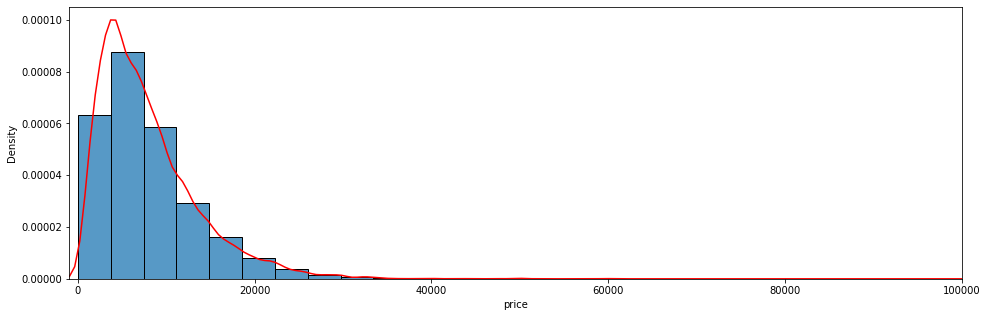

In [97]:
fig = plt.figure(figsize=(16, 5))
feat = "price"
sns.histplot(data[feat], palette='Blues', stat='density', bins=30)
sns.kdeplot(data[feat], color='red')
plt.xlim(-1000, 100000);

In [90]:
data[feat].mean()

7938.978877753176

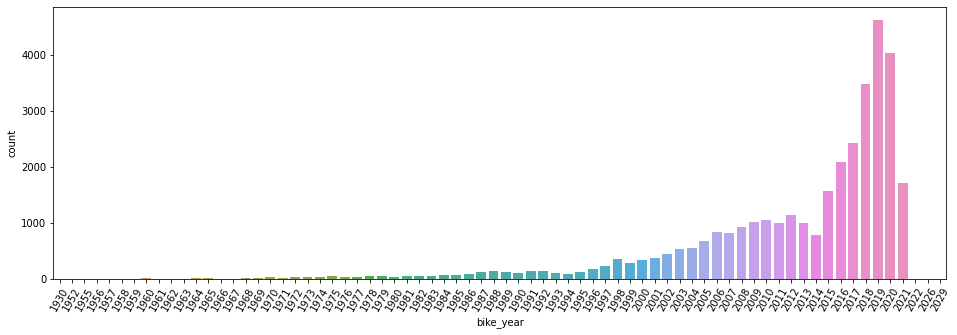

In [91]:
fig = plt.figure(figsize=(16, 5))
sns.countplot(data=data.sort_values(by="bike_year", ascending=True), x="bike_year")
plt.xticks(rotation=60);

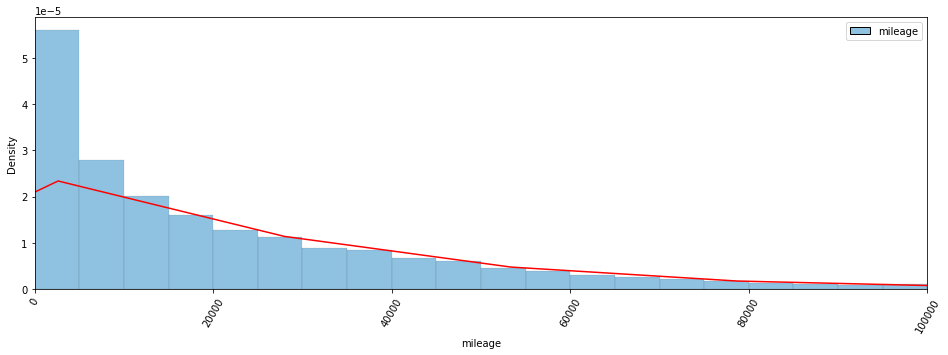

In [92]:
fig = plt.figure(figsize=(16, 5))
#plt.hist(data["mileage"], bins=1000)
sns.histplot(data[["mileage"]], palette='Blues', stat='density', bins=1000)
sns.kdeplot(data["mileage"], color='red')
plt.xticks(rotation=60);
plt.xlim(0, 100000);

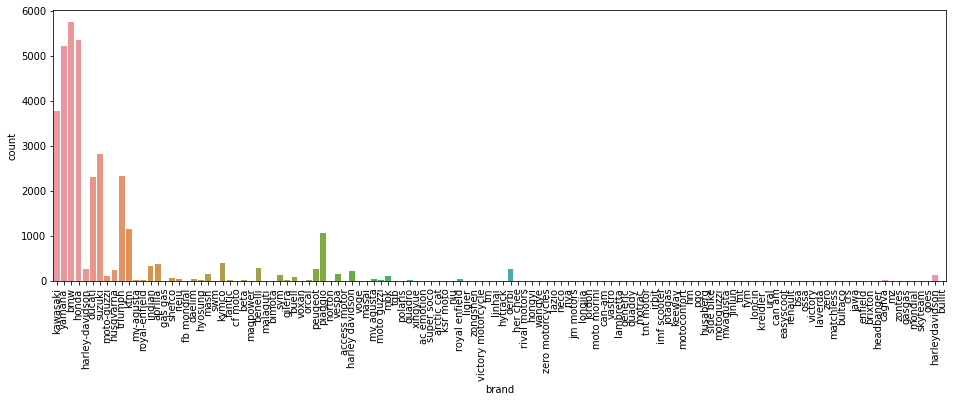

In [93]:
fig = plt.figure(figsize=(16, 5))
sns.countplot(data=data, x="brand")
plt.xticks(rotation=90);

In [83]:
#pd.DataFrame(data["brand"].value_counts()).head(50)

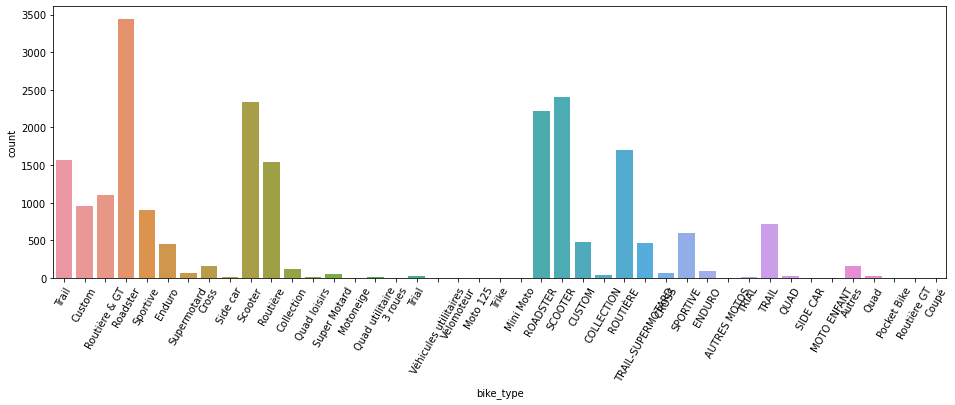

In [94]:
fig = plt.figure(figsize=(16, 5))
sns.countplot(data=data, x="bike_type")
plt.xticks(rotation=60);

# Check files

In [2]:
import pandas as pd

In [73]:
motomag_data = pd.read_csv("gs://tresboncoin/tresboncoin/data/scraping_outputs/motomag.csv")

In [74]:
motomag_data.shape

(4963, 15)

In [23]:
motomag_data.drop_duplicates(inplace=True, subset=['brand', "model", "price", "bike_year", "bike_type", "engine_size", "mileage"])

In [17]:
motomag_data["checkref"] = np.nan
moto_ref_list = []

In [18]:
for k in range(motomag_data.shape[0]):
    moto_ref_list.append(str(motomag_data.iloc[k]["brand"])+\
                         str(motomag_data.iloc[k]["model"])+\
                         str(motomag_data.iloc[k]["bike_year"])+\
                         str(motomag_data.iloc[k]["bike_type"])+\
                         str(motomag_data.iloc[k]["engine_size"])+\
                         str(motomag_data.iloc[k]["mileage"]))

In [21]:
motomag_data["checkref"] = pd.Series(moto_ref_list)

In [25]:
motomag_data.head()

,uniq_id,reference,brand,model,price,bike_year,bike_type,engine_size,mileage,source,scraped_date,url,age,checkref
0,motomag-8402762,8402762,kawasaki,ninja 650 47.5,6600,2019,Roadster,650,5900,motomag,2021-07-01 14:18:50.307464,https://www.motomag.com/spip.php?page=pamoto&i...,2,kawasakininja 650 47.52019Roadster6505900
1,motomag-8403249,8403249,triumph,thruxton 1200 tfc,22900,2019,Roadster,1200,7300,motomag,2021-07-01 14:18:50.375261,https://www.motomag.com/spip.php?page=pamoto&i...,2,triumphthruxton 1200 tfc2019Roadster12007300
2,motomag-8402016,8402016,polaris,sportsman,15599,2020,Quad loisirs,1000,2100,motomag,2021-07-01 14:18:50.437110,https://www.motomag.com/spip.php?page=pamoto&i...,1,polarissportsman2020Quad loisirs10002100
3,motomag-8403273,8403273,benelli,leoncino,4590,2019,Routière,500,8529,motomag,2021-07-01 14:18:50.501705,https://www.motomag.com/spip.php?page=pamoto&i...,2,benellileoncino2019Routière5008529
4,motomag-8401178,8401178,honda,gl 1800 goldwing dct,27000,2019,Routière,1800,10300,motomag,2021-07-01 14:18:50.564982,https://www.motomag.com/spip.php?page=pamoto&i...,2,hondagl 1800 goldwing dct2019Routière180010300


In [26]:
motomag_data.to_csv(path_or_buf="motomag.csv")

In [49]:
data_master_new.to_csv("data_master.csv")